In [21]:
%matplotlib inline
import cv2
import numpy as np

In [22]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

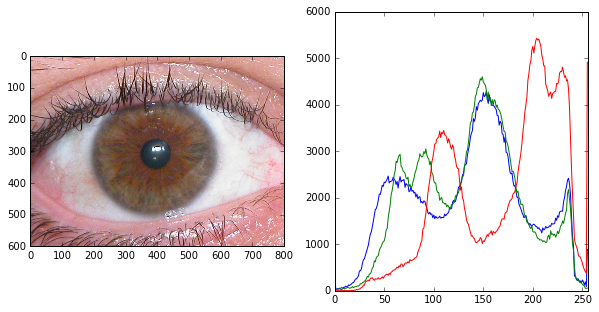

In [35]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('..\colorImages\iris.jpg')
img1 = cv2.imread('..\colorImages\iris_1.jpg')
img2 = cv2.imread('..\colorImages\iris_2.jpg')
img3 = cv2.imread('..\colorImages\iris_3.jpg')
img4 = cv2.imread('..\colorImages\iris_4.jpg')

plt.figure(figsize=(10,5)) 

plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    

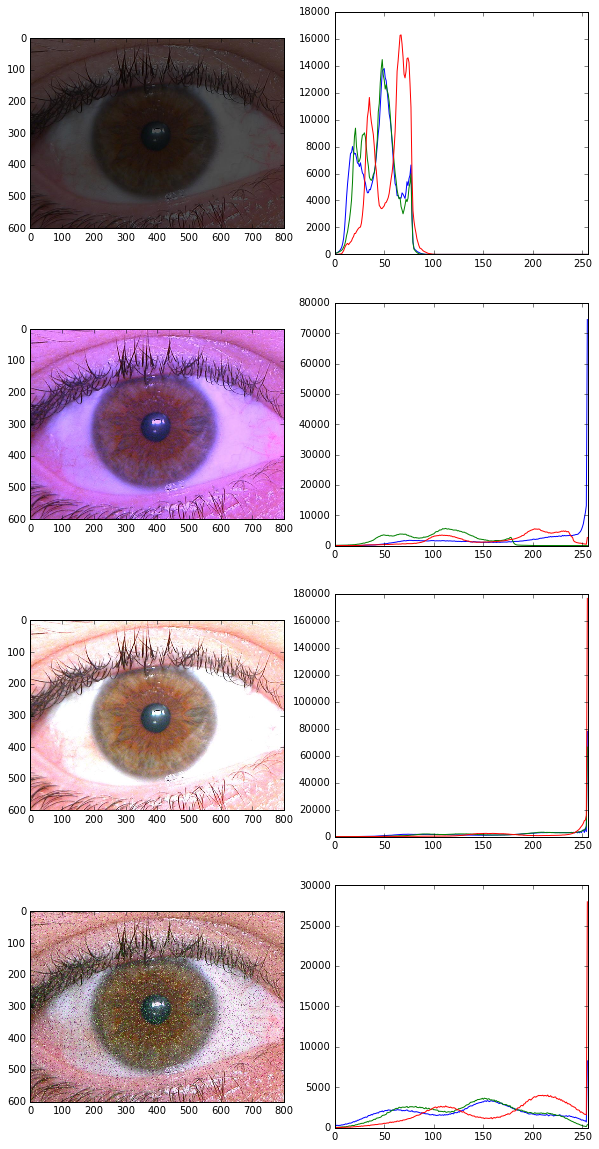

In [40]:
plt.figure(figsize=(10,20)) 
plt.subplot(421);plt.imshow(invertChannels(img1))
plt.subplot(422)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

plt.subplot(423);plt.imshow(invertChannels(img2))
plt.subplot(424)
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  
    
plt.subplot(425);plt.imshow(invertChannels(img3))
plt.subplot(426)
for i,col in enumerate(color):
    histr = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  
    
plt.subplot(427);plt.imshow(invertChannels(img4))
plt.subplot(428)
for i,col in enumerate(color):
    histr = cv2.calcHist([img4],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

# Iris_1 Image filtering

In [225]:
img1[:,:,1].shape

(600, 800)

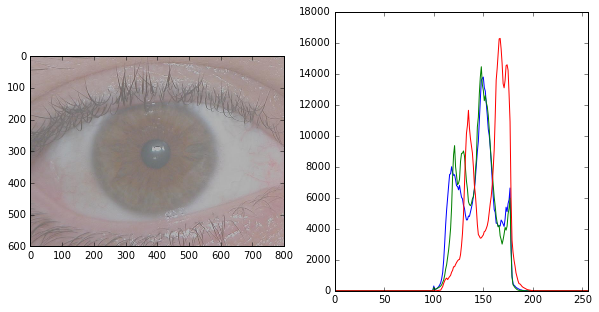

In [195]:
# increase brightness

plt.figure(figsize=(10,5)) 
img1_r1 = (img1 + 100).astype('uint8')
plt.subplot(121)
plt.imshow(invertChannels(img1_r1))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1_r1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 

In [234]:
# build look up table
high = np.max(img1_r1)
low = np.min(img1_r1)

x = np.linspace(0,255,256);

declive = 255./(high - low);
ordenada = - declive * low;
print high
print low
print ordenada
print declive
table = declive * x + ordenada;
table[0:low] = 0;
table[high:256] = 255;

207
100
-238.317757009
2.38317757009


In [235]:
table = np.array([table.astype('uint8')])

In [236]:
img1_r1[:,:,1]

array([[161, 161, 162, ..., 164, 158, 152],
       [159, 159, 160, ..., 165, 160, 155],
       [157, 157, 157, ..., 163, 160, 157],
       ..., 
       [118, 122, 128, ..., 151, 151, 151],
       [124, 128, 133, ..., 151, 151, 151],
       [130, 134, 139, ..., 152, 152, 152]], dtype=uint8)

In [237]:
table

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   4,   7,
          9,  11,  14,  16,  19,  21,  23,  26,  28,  30,  33,  35,  38,
         40,  42,  45,  47,  50,  52,  54,  57,  59,  61,  64,  66,  69,
         71,  73,  76,  78,  81,  83,  85,  88,  90,  92,  95,  97, 100,
        102, 104, 107, 109, 112, 114, 116, 119, 121, 123, 126, 128, 131,
        133, 135, 138, 140, 142, 145, 147, 150, 152, 154, 157, 159, 162,
        164, 166, 169, 171, 173, 176, 178, 181, 183

In [238]:
img1_r2 = cv2.LUT(img1_r1,table)

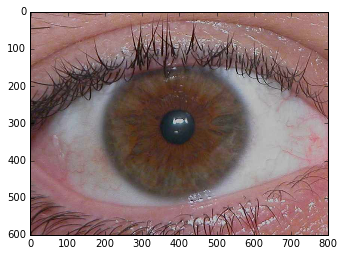

In [239]:
plt.imshow(invertChannels(img1_r2))

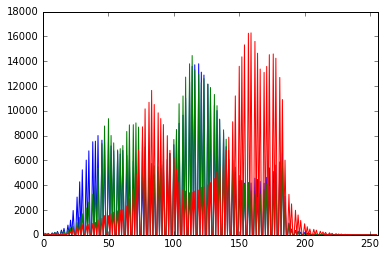

In [240]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img1_r2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  